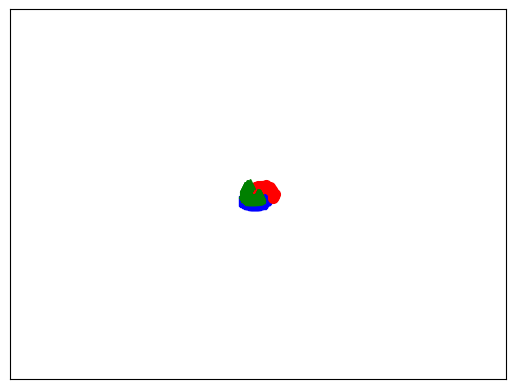

iter : 0, loss : 1.098608
iter : 1000, loss : 1.098612
iter : 2000, loss : 1.098612
iter : 3000, loss : 1.098612
iter : 4000, loss : 1.098612
iter : 5000, loss : 1.098612
iter : 6000, loss : 1.098612
iter : 7000, loss : 1.098612
iter : 8000, loss : 1.098612
iter : 9000, loss : 1.098612
training accuracy: 33.33 %


In [2]:
from __future__ import division, print_function, unicode_literals
import math
import numpy as np
import matplotlib.pyplot as plt

N = 100 # Tổng số features trong dataset
d0 = 2 # Dimensionality
C = 3 # Số classes
X = np.zeros((d0, N*C)) # Tạo ma trận dữ liệu (mỗi hàng = số example)
y = np.zeros(N*C, dtype='uint8') # Lớp label

for j in range(C) :
    ix = range(N*j, N*(j+1))
    r = np.linspace(0,0.1,N) # Radius
    t = np.linspace(j*4, (j+1)*4, N) + np.random.randn(N)*0.2 # Theta (Learning Rate)
    X[:,ix] = np.c_[r*np.sin(t), r*np.cos(t)].T
    y[ix] = j

# Matplotlib visualize the data

plt.plot(X[0, :N], X[1, :N], 'bs', markersize = 7)
plt.plot(X[0, N:2*N], X[1, N:2*N], 'ro', markersize = 7)
plt.plot(X[0, 2*N:], X[1, 2*N:], 'g^', markersize =7)
#
# # axis
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.get_xaxis().set_ticks([])
cur_axes.get_yaxis().set_ticks([])

plt.savefig('Ex.png', bbox_inches = 'tight', dpi = 600)
plt.show()

def softmax(V) :
    e_V = np.exp(V- np.max(V, axis=0, keepdims= True))
    Z = e_V / e_V.sum(axis=0)
    return Z

# One-hot encoding
from scipy import sparse
def convert_labels(y, C=3) :
    Y = sparse.coo_matrix((np.ones_like(y),
                           (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y

def cost(Y, Yhat) :
    return -np.sum(Y*np.log(Yhat))/Y.shape[1]
d0 = 2
d1 = h = 100 # Kích cỡ của hidden layers
d2 = C = 3 #Số chiều của ma trận

# Khởi tạo parameters ngẫu nhiên
W1 = 0.01*np.random.randn(d0,d1)
b1 = np.zeros((d1,1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((d2,1))

Y = convert_labels(y, C)
N = X.shape[1]
eta = 1 #Learning Rate
for i in range(10000) :
    Z1 = np.dot(W1.T, X) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = np.dot(W2.T, A1) + b2
    Yhat = softmax(Z2)
    # In ra loss sau mỗi 1000 lần lặp
    if i%1000 == 0:
        loss = cost(Y, Yhat)
        print("iter : %d, loss : %f" %(i, loss))
    E2 = (Yhat - Y)/N
    dW2 = np.dot(A1, E2.T)
    db2 = np.sum(E2, axis=1, keepdims=True)
    E1 = np.dot(W2, E2)
    E1[Z1 <= 0] = 0 # Gradient của ReLU
    dW1 = np.dot(X, E1.T)
    db1 = np.sum(E1, axis= 1, keepdims=True)

    #Cập nhật Gradient Descent
    W1 += -eta*dW1
    b1 += -eta*db1
    W2 += -eta*W2
    b2 += -eta*db2

#Result
Z1 = np.dot(W1.T, X) + b1
A1 = np.maximum(Z1, 0)
Z2 = np.dot(W2.T, A1) + b2
predicted_class = np.argmax(Z2, axis=0)
print('training accuracy: %.2f %%' % (100*np.mean(predicted_class == y)))
